In [412]:
import numpy as np
import pandas as pd

In [413]:
train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')
# submit=pd.read_csv("titanic/gender_submission.csv")

In [414]:
print(train.shape)         # 모의고사 문제/정답
print(test.shape)          # 실전 수능 문제

(891, 12)
(418, 11)


In [478]:
# train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_mean,Gender,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Family,Family_S,Family_M,Family_L
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,34.5,False,False,False,True,1,S,True,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,47.0,True,True,False,False,2,M,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,62.0,False,False,False,True,1,S,True,False,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,27.0,False,True,False,False,1,S,True,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,22.0,True,True,False,False,3,M,False,True,False


In [479]:
train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_mean,FamilySize
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,29.699118,1.904602
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,13.002015,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.420000,1.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,22.000000,1.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,29.699118,1.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,35.000000,2.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,80.000000,11.000000


In [480]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_mean     891 non-null    float64 
 13  Gender       891 non-null    bool    
 14  Embarked_S   891 non-null    bool    
 15  Embarked_C   891 non-null    bool    
 16  Embarked_Q   891 non-null    bool    
 17  FamilySize   891 non-null    int64   
 18  Family       891 non-null    o

In [484]:
#성별을 기준으로 그룹화 했을때 각 성별에 대한 생존률을 출력
train.groupby('Sex')['Survived'].mean()
train.groupby('Sex')[['Survived']].mean()

# train.pivot_table(values=['Survived'], index='Sex', aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [485]:
train.pivot_table(values=['Survived'], index='Sex', aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [487]:
train.groupby('Sex')['Survived'].describe() # 성별로 그룹화 했을때 생존여부 컬럼값에 대한 기술통계

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [488]:
train.pivot_table(values=['Survived'], index=['Sex','Pclass'], aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [493]:
# test.info()
test['Survived']=(test.Sex=='female')
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin  ... Age_mean  Gender  \
0  34.5      0      0   330911   7.8292   NaN  ...     34.5   False   
1  47.0      1      0   363272   7.0000   NaN  ...     47.0    True   
2  62.0      0      0   240276   9.6875   NaN  ...     62.0   False   
3  27.0      0      0   315154   8.6625   NaN  ...     27.0   False   
4  22.0      1      1  3101298  12.2875   NaN  ...     22.0    True   

   Embarked_S  Embarked_C  Embarked_Q  FamilySize  Family  Family_S Family_M  \
0       Fals

In [494]:
test['Survived'].value_counts()

False    266
True     152
Name: Survived, dtype: int64

In [495]:
submission=test[['PassengerId','Survived']].copy()
submission

,PassengerId,Survived
0,892,False
1,893,True
2,894,False
3,895,False
4,896,True
...,...,...
413,1305,False
414,1306,True
415,1307,False
416,1308,False


In [496]:
submission['Survived']=submission['Survived'].astype(int)

In [497]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [428]:
submission.to_csv('submission.csv', index=False)

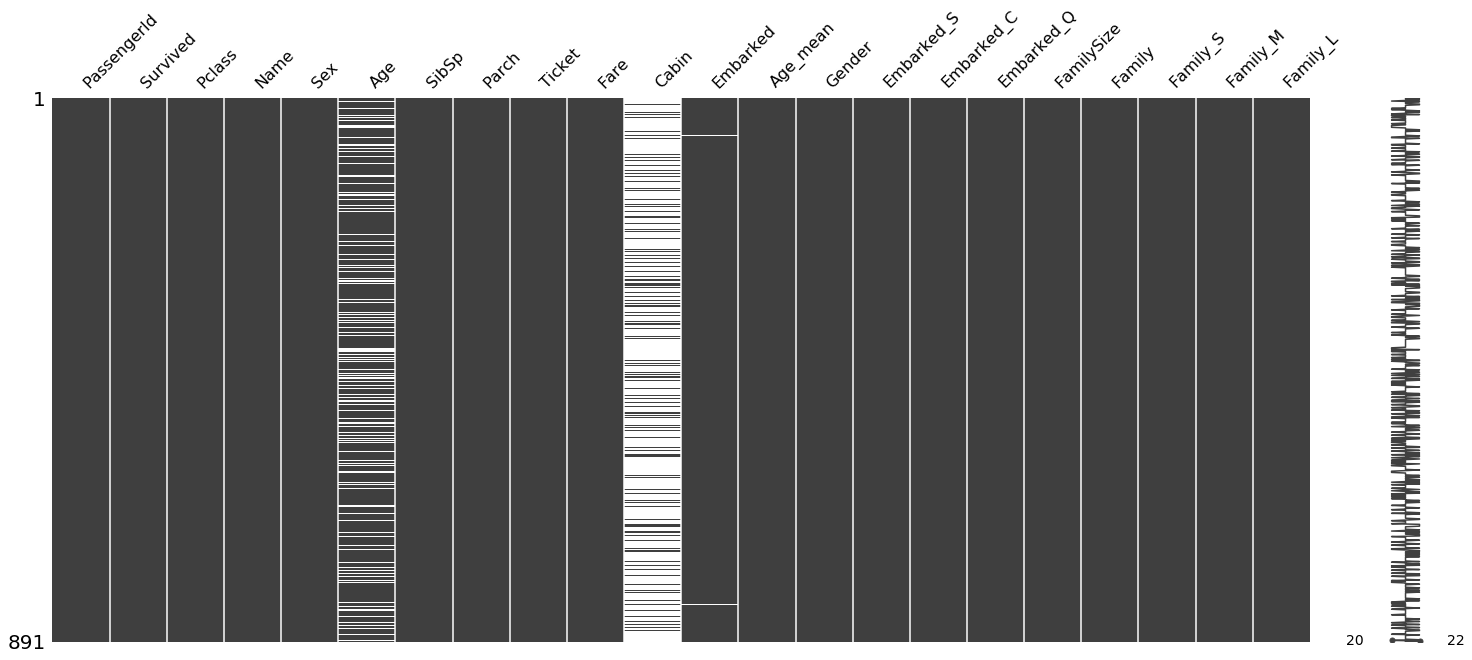

In [498]:
import missingno as msno
msno.matrix(train)

In [499]:
#결측값 개수 출력
# np.sum(train.isnull())
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
Gender           0
Embarked_S       0
Embarked_C       0
Embarked_Q       0
FamilySize       0
Family           0
Family_S         0
Family_M         0
Family_L         0
dtype: int64

In [432]:
train['Age_mean']=train['Age']
train['Age'].mean()
train['Age_mean'].fillna(train['Age'].mean(), inplace=True)
train['Age_mean'].isnull().sum()

0

In [433]:
test.Age.isnull().sum()

86

In [434]:
test['Age_mean']=test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace=True)
test['Age_mean'].isnull().sum()

0

In [435]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [436]:
train['Gender']=(train['Sex']=='female')
test['Gender']=(test['Sex']=='female')
# female -> True, male -> False

In [437]:
train['Embarked'].value_counts()
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [438]:
train['Embarked'].isnull().sum()       # 2 (결측치 처리)
test['Embarked'].isnull().sum()         # 0

0

In [439]:
train['Embarked_S']=train['Embarked']=='S' # S에서 탄 사람만 나오게 출력
# train[train['Embarked']!='S']        
train['Embarked_C']=train['Embarked']=='C'
train['Embarked_Q']=train['Embarked']=='Q'

In [440]:
train[['Embarked_S','Embarked_C','Embarked_Q','Embarked']]       # 원핫인코딩(하나만 핫하게 뽑아주는 코딩)

,Embarked_S,Embarked_C,Embarked_Q,Embarked
0,True,False,False,S
1,False,True,False,C
2,True,False,False,S
3,True,False,False,S
4,True,False,False,S
...,...,...,...,...
886,True,False,False,S
887,True,False,False,S
888,True,False,False,S
889,False,True,False,C


In [441]:
# 원핫인코딩
# A,B,C,D,E,F
# A:10000
# B:01000
# C:00001
#     ....

In [442]:
test['Embarked_S']=test['Embarked']=='S'
test['Embarked_C']=test['Embarked']=='C'
test['Embarked_Q']=test['Embarked']=='Q'

In [443]:
test[['Embarked_S','Embarked_C','Embarked_Q','Embarked']]  

,Embarked_S,Embarked_C,Embarked_Q,Embarked
0,False,False,True,Q
1,True,False,False,S
2,False,False,True,Q
3,True,False,False,S
4,True,False,False,S
...,...,...,...,...
413,True,False,False,S
414,False,True,False,C
415,True,False,False,S
416,True,False,False,S


In [444]:
#가족 수 구하기

In [445]:
# train.info()
train['SibSp']
train['Parch']
train['FamilySize']=train['SibSp']+train['Parch']+1

In [446]:
train['FamilySize']       # 특성공학 : 기존에 가지고 있는 변수들로  새로운 변수를 만드는 과정
                                            # feature engineering

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [447]:
# 가족 구성원 수 별로 건수를 출력

In [448]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [449]:
train['Family']=train['FamilySize']

In [450]:
train.head()
# 가족 수가 1이면 Family='S'
# 가족 수가 2이상 5미만이면 Famliy="M"
# 가족 수가 5 이상이면 Family='L'
train.loc[train['FamilySize']==1, 'Family']='S'
train.loc[(train['FamilySize']>1)&(train['FamilySize']<5), 'Family']='M'
train.loc[train['FamilySize']>4, 'Family']='L'

In [451]:
train['Family']

0      M
1      M
2      S
3      M
4      S
      ..
886    S
887    S
888    M
889    S
890    S
Name: Family, Length: 891, dtype: object

In [452]:
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1)&(train['FamilySize'] < 5), 'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'
train['Family']

0      M
1      M
2      S
3      M
4      S
      ..
886    S
887    S
888    M
889    S
890    S
Name: Family, Length: 891, dtype: object

In [453]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Gender,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,False,True,False,False,2,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,True,False,True,False,2,M
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,True,True,False,False,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,True,True,False,False,2,M
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,False,True,False,False,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,False,True,False,False,1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,True,True,False,False,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,True,True,False,False,4,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,False,False,True,False,1,S


In [454]:
train[['Family', 'FamilySize']]

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1
...,...,...
886,S,1
887,S,1
888,M,4
889,S,1


In [455]:
# 가족수 원핫 인코딩
train['Family_S']=train['Family']=='S'
train['Family_M']=train['Family']=='M'
train['Family_L']=train['Family']=='L'

In [456]:
train[['Family_S','Family_M','Family_L']]

,Family_S,Family_M,Family_L
0,False,True,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
886,True,False,False
887,True,False,False
888,False,True,False
889,True,False,False


In [457]:
test['FamilySize']=test['SibSp']+test['Parch']+1
test['Family']=test['FamilySize']
test.loc[test['FamilySize']==1, 'Family']='S'
test.loc[(test['FamilySize']>1)&(test['FamilySize']<5), 'Family']='M'
test.loc[test['FamilySize']>4, 'Family']='L'

In [458]:
test.head()

test['Family_S']=test['Family']=='S'
test['Family_M']=test['Family']=='M'
test['Family_L']=test['Family']=='L'

In [459]:
test['Family']
#종류별 데이터 합계
test.Family.value_counts()
test['Family'].value_counts()

S    253
M    145
L     20
Name: Family, dtype: int64

In [460]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [461]:
train['Pclass'].value_counts()
train['Pclass'].dtypes                # int : 연속형

dtype('int64')

In [462]:
train['Pclass']=train['Pclass'].astype('category')
train['Pclass'].dtypes  

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [463]:
fn=['Gender', 'Age_mean', 'Embarked_S','Embarked_Q','Embarked_C','Family_S','Family_M','Family_L']

In [464]:
# train.info()
# train[fn]
yLabel=train['Survived']        
# 출력변수  = 종속변수
# 입력변수 = 독립변수
# 출력변수 = 함수(입력변수) <=> 종속변수 = 함수(독립변수)
# train['Survived']=함수(train[fn])

In [465]:
xTest=test[fn]
xTest
xTrain=train[fn]
xTrain

,Gender,Age_mean,Embarked_S,Embarked_Q,Embarked_C,Family_S,Family_M,Family_L
0,False,22.000000,True,False,False,False,True,False
1,True,38.000000,False,False,True,False,True,False
2,True,26.000000,True,False,False,True,False,False
3,True,35.000000,True,False,False,False,True,False
4,False,35.000000,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
886,False,27.000000,True,False,False,True,False,False
887,True,19.000000,True,False,False,True,False,False
888,True,29.699118,True,False,False,False,True,False
889,False,26.000000,False,False,True,True,False,False


In [466]:
xTrain       # 모델 입력 변수
yLabel      # 모델 출력 변수
# yLabel=model(xTrain)
# 테스트 -> mdel(xTest) -> y(생존여부) -> 제출

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [467]:
from sklearn.tree import DecisionTreeClassifier

In [468]:
model=DecisionTreeClassifier(max_depth=5, random_state=2020)
model
model.fit(xTrain, yLabel)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

In [469]:
from sklearn.model_selection import KFold, cross_val_score

In [470]:
kFold=KFold(n_splits=10, shuffle=True, random_state=2020)

In [471]:
score=cross_val_score(model, xTrain, yLabel, cv=kFold, n_jobs=-1, scoring='accuracy')
print(score)

[0.88888889 0.70786517 0.83146067 0.82022472 0.76404494 0.82022472
 0.85393258 0.85393258 0.83146067 0.83146067]


In [472]:
round(np.mean(score)*100,2)

82.03

In [473]:
test['Survived']=model.predict(xTest)

In [474]:
sm=test[['PassengerId', 'Survived']]
sm.to_csv('submission2.csv', index=False)